# Geopandas - Projections

<div style='background:#B1F9E3; color:#000000' class= 'alert alert-box'>
Coordinate reference systems (CRS) are important because the geometric shapes in a GeoDataFrame are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates are related to places on the Earth. A map projection (or a projected coordinate system) is a systematic transformation of the latitudes and longitudes into a plain surface where units are quite commonly represented as meters (instead of decimal degrees). This transformation is used to represent the three dimensional earth on a flat, two dimensional map.<br><br>

As the CRS in different spatial datasets differ fairly often (i.e. one might have coordinates defined in decimal degrees while the other one has them in meters), it is a common procedure to reproject (transform) different layers into a common CRS. It is important that the layers are in the same coordinate reference system when analyzing the spatial relationships between the layers, for example, when making a Point in Polygon -query, or other type of overlay analysis.<br><br>

Choosing an appropriate projection for your map is not always straightforward because it depends on what you actually want to represent with your map, and what is the spatial scale of your data. In fact, there is not a single “perfect projection” since each one of them has some strengths and weaknesses, and you should choose a projection that fits best for your needs.
</div>

In [1]:
# Importing geopandas
import geopandas as gpd

In [2]:
# Reading shapefile from the zipped folder
# refer: https://geopandas.org/en/v0.8.2/io.html
zipfile = "zip:///Users/wwwsu/Pratical_Class/geodata/ne_10m_admin_0_countries.zip"

In [3]:
countries = gpd.read_file(zipfile)

<Axes: >

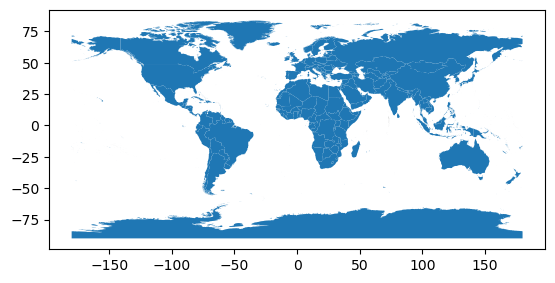

In [4]:
countries.plot()

In [5]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
countries.crs.name

'WGS 84'

In [7]:
# to check the projection system is available or not in geopandas
from pyproj import CRS
CRS("ESRI:54009")

<Projected CRS: ESRI:54009>
Name: World_Mollweide
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Mollweide
- method: Mollweide
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
# Reprojection
# Reproject the data
# Refer https://map-projections.net/imglist.php
# https://epsg.io/
# https://proj4.org/en/9.3/operations/projections/
# https://spatialreference.org/

countries_robinson = countries.to_crs("ESRI:54009")

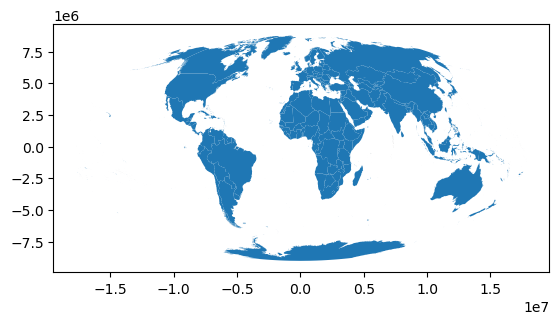

In [9]:
countries_robinson.plot();

In [10]:
from pyproj import CRS
CRS("ESRI:54043")

<Projected CRS: ESRI:54043>
Name: World_Aitoff
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Aitoff
- method: Aitoff
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
countries_aitoff = countries.to_crs("ESRI:54043")

<Axes: >

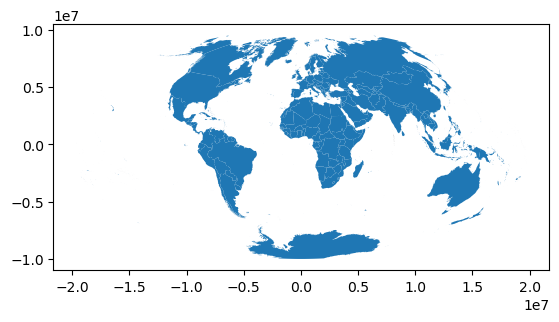

In [12]:
countries_aitoff.plot()

In [13]:
# Reading Shapefile from Online
url = 'https://kgis.ksrsac.in/kgisdocuments/PDF_KML_SHP/State/Shapefiles/State.zip'

In [14]:
state = gpd.read_file(url)

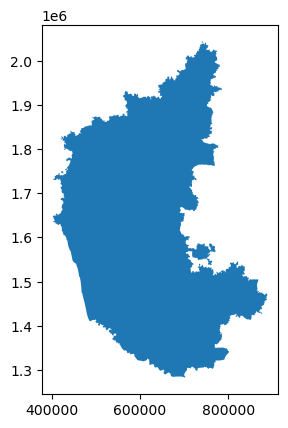

In [15]:
state.plot();

In [16]:
state.crs.name

'WGS 84 / UTM zone 43N'

In [17]:
# bring back to WGS 84
try:
    a = CRS("ESRI:4326")
except:
    a = CRS("EPSG:4326")
a

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

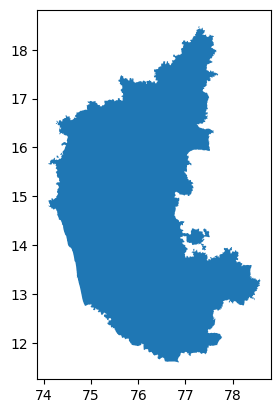

In [18]:
state_wgs84 = state.to_crs('EPSG:4326')
state_wgs84.plot();